In [ ]:
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


df = pd.read_csv('/content/drive/My Drive/NKI_cleaned.csv', encoding='iso-8859-1')


In [ ]:
data =df

In [ ]:
# Selecting the specified features and targets
features = data[['age', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil']]
targets = data[['timerecurrence', 'chemo', 'hormonal', 'amputation']]

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize metrics
accuracy_scores = {}
mean_squared_errors = {}

models = {}

# For each categorical target (chemo, hormonal, amputation), use SVC (classification)
for target in ['chemo', 'hormonal', 'amputation']:
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train_scaled, y_train[target])

    # Predictions and accuracy score
    predictions = svm_model.predict(X_test_scaled)
    accuracy_scores[target] = accuracy_score(y_test[target], predictions)
    models[target] = svm_model

# For the continuous target (timerecurrence), use SVR (regression)
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train['timerecurrence'])
models['timerecurrence'] = svr_model

# Predictions and mean squared error
predictions = svr_model.predict(X_test_scaled)
mean_squared_errors['timerecurrence'] = mean_squared_error(y_test['timerecurrence'], predictions)

accuracy_scores, mean_squared_errors


({'chemo': 0.8,
  'hormonal': 0.8181818181818182,
  'amputation': 0.6363636363636364},
 {'timerecurrence': 22.646476209611055})

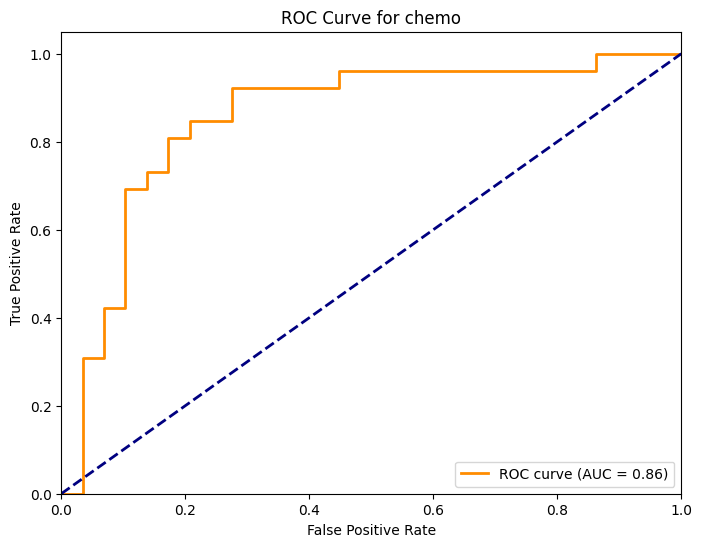

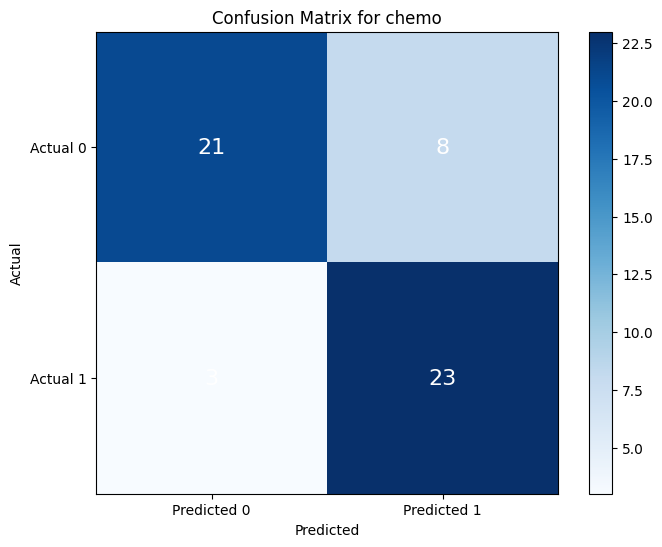

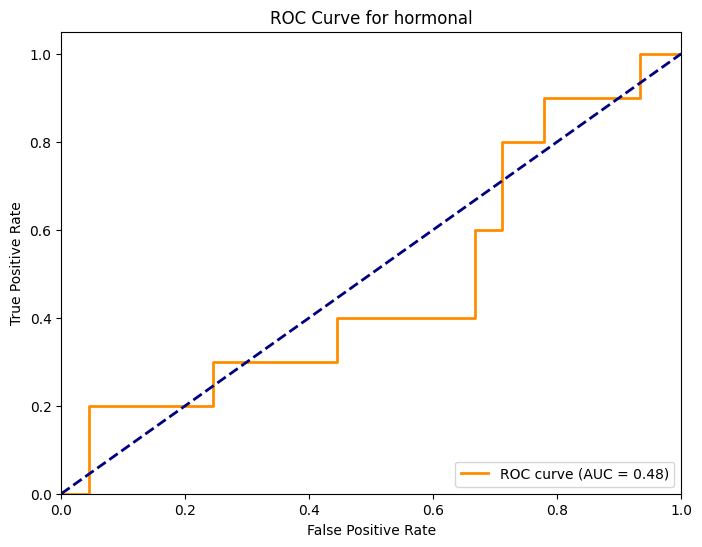

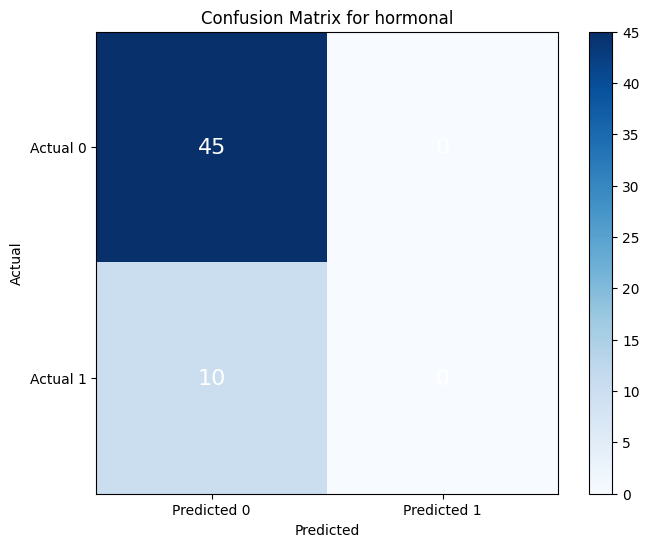

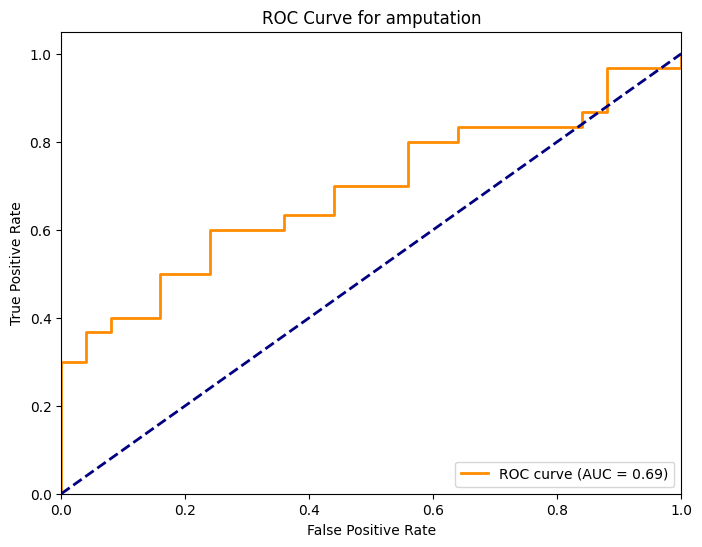

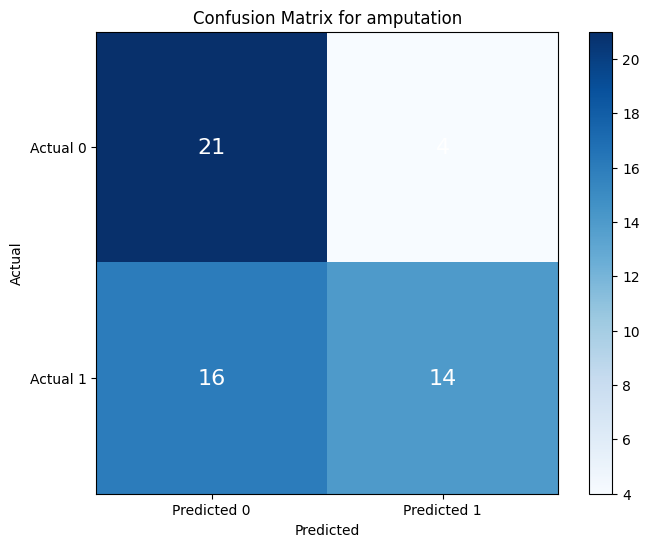

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, target_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {target_name}')
    plt.colorbar()
    classes = [0, 1]  # Assuming binary classification
    plt.xticks(classes, [f'Predicted {c}' for c in classes])
    plt.yticks(classes, [f'Actual {c}' for c in classes])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Add text annotations for each cell
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center', fontsize=16, color='white')

    plt.show()

# Iterate through each binary target
for target in ['chemo', 'hormonal', 'amputation']:
    # Use the trained model to predict probabilities
    predicted_probs = models[target].decision_function(X_test_scaled)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test[target], predicted_probs)

    # Calculate AUC (Area Under the Curve)
    auc = roc_auc_score(y_test[target], predicted_probs)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {target}')
    plt.legend(loc='lower right')
    plt.show()

    # Calculate and plot confusion matrix
    predicted_labels = models[target].predict(X_test_scaled)
    plot_confusion_matrix(y_test[target], predicted_labels, target)


In [ ]:
import math
rmse = math.sqrt(22.64647620961099)
rmse

4.758831391172731

In [ ]:
def collect_user_inputs():
    # Prompt for each feature input
    print("Please enter the feature values:")
    age = float(input("Age: "))
    histtype = float(input("Histtype: "))
    diam = float(input("Diam: "))
    posnodes = float(input("Posnodes: "))
    grade = float(input("Grade: "))
    angioinv = float(input("Angioinv: "))
    lymphinfil = float(input("Lymphinfil: "))

    # Create a DataFrame for the input features
    user_features = pd.DataFrame([[age, histtype, diam, posnodes, grade, angioinv, lymphinfil]],
                                 columns=['age', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil'])
    return user_features

def make_predictions(user_features, models, scaler):
    # Scale the user features
    user_features_scaled = scaler.transform(user_features)

    # Making predictions using the trained models
    predictions = {}
    for target, model in models.items():
        predictions[target] = model.predict(user_features_scaled)[0]

    return predictions

# Assuming your models are stored in a dictionary like this:
# models = {'chemo': chemo_model, 'hormonal': hormonal_model, 'amputation': amputation_model, 'timerecurrence': timerecurrence_model}

# Collect user inputs
user_features = collect_user_inputs()

# Make predictions
predictions = make_predictions(user_features, models, scaler)

# Display predictions
print("Predictions:")
for target, prediction in predictions.items():
    print(f"{target}: {prediction}")


Please enter the feature values:
Age: 28
Histtype: 1
Diam: 18
Posnodes: 3
Grade: 1
Angioinv: 1
Lymphinfil: 1
Predictions:
chemo: 1
hormonal: 0
amputation: 0
timerecurrence: 6.135042411324235


In [ ]:
# SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.svm import SVC, SVR

# Assuming 'data' is a pandas DataFrame with the necessary features and targets
features = df[['age', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil']]
targets = df[['timerecurrence', 'chemo', 'hormonal', 'amputation']]

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize metrics dictionaries
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
mean_squared_errors = {}

models = {}

# For each categorical target (chemo, hormonal, amputation), use SVC (classification)
for target in ['chemo', 'hormonal', 'amputation']:
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train_scaled, y_train[target])

    # Predictions and metrics calculation
    predictions = svm_model.predict(X_test_scaled)
    accuracy_scores[target] = accuracy_score(y_test[target], predictions)
    precision_scores[target] = precision_score(y_test[target], predictions)
    recall_scores[target] = recall_score(y_test[target], predictions)
    f1_scores[target] = f1_score(y_test[target], predictions)
    models[target] = svm_model

# For the continuous target (timerecurrence), use SVR (regression)
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train['timerecurrence'])
models['timerecurrence'] = svr_model

# Predictions and mean squared error
predictions = svr_model.predict(X_test_scaled)
mean_squared_errors['timerecurrence'] = mean_squared_error(y_test['timerecurrence'], predictions)

# Collecting all metrics in a single dictionary for output
metrics = {
    'accuracy': accuracy_scores,
    'precision': precision_scores,
    'recall': recall_scores,
    'f1_score': f1_scores,
    'mean_squared_error': mean_squared_errors
}

metrics


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': {'chemo': 0.8,
  'hormonal': 0.8181818181818182,
  'amputation': 0.6363636363636364},
 'precision': {'chemo': 0.7419354838709677,
  'hormonal': 0.0,
  'amputation': 0.7777777777777778},
 'recall': {'chemo': 0.8846153846153846,
  'hormonal': 0.0,
  'amputation': 0.4666666666666667},
 'f1_score': {'chemo': 0.8070175438596492,
  'hormonal': 0.0,
  'amputation': 0.5833333333333334},
 'mean_squared_error': {'timerecurrence': 22.64647620961099}}

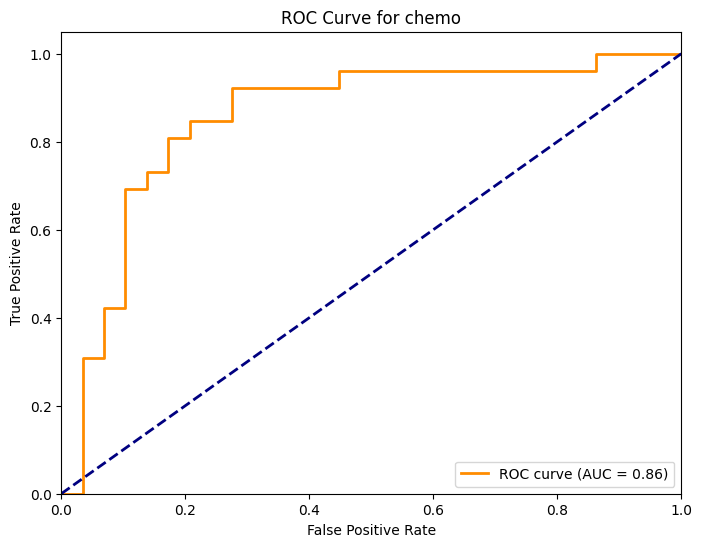

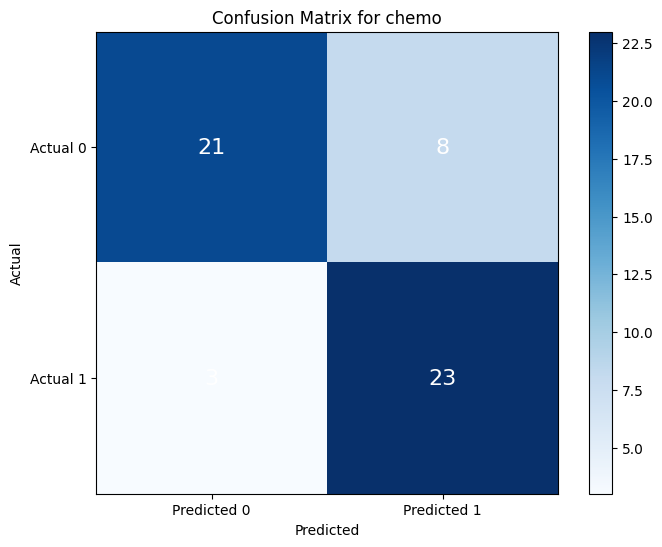

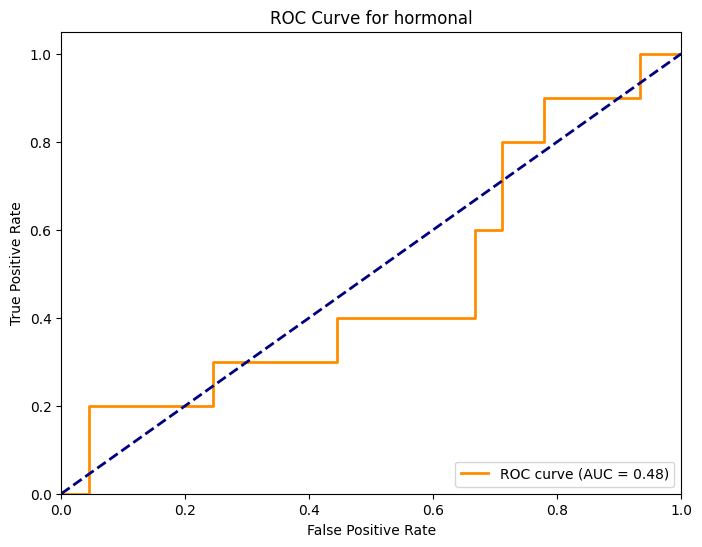

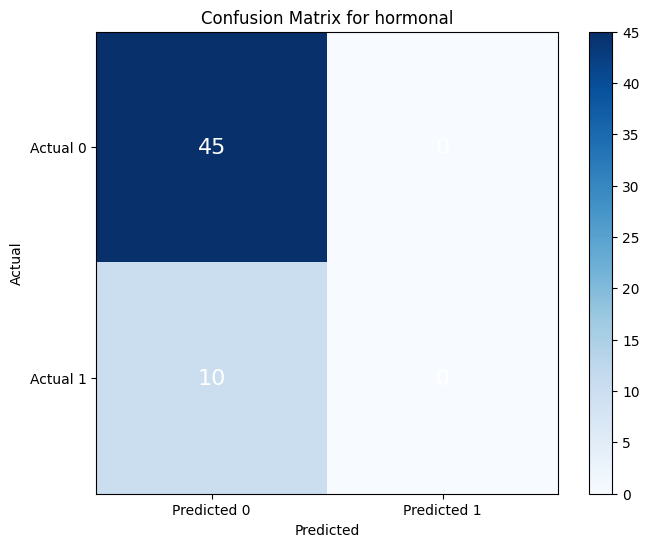

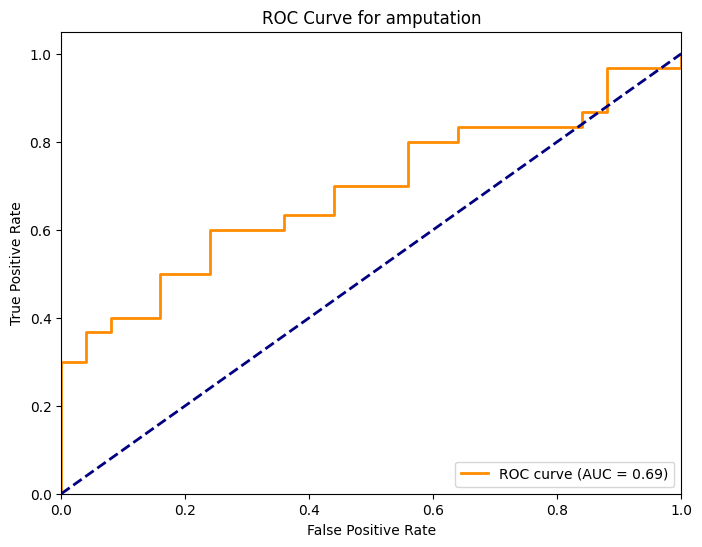

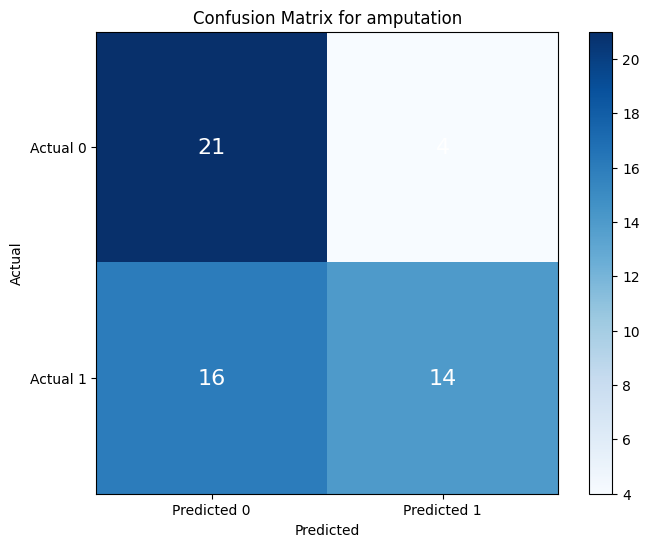

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, target_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {target_name}')
    plt.colorbar()
    classes = [0, 1]  # Assuming binary classification
    plt.xticks(classes, [f'Predicted {c}' for c in classes])
    plt.yticks(classes, [f'Actual {c}' for c in classes])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Add text annotations for each cell
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center', fontsize=16, color='white')

    plt.show()

# Iterate through each binary target
for target in ['chemo', 'hormonal', 'amputation']:
    # Use the trained model to predict probabilities
    predicted_probs = models[target].decision_function(X_test_scaled)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test[target], predicted_probs)

    # Calculate AUC (Area Under the Curve)
    auc = roc_auc_score(y_test[target], predicted_probs)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {target}')
    plt.legend(loc='lower right')
    plt.show()

    # Calculate and plot confusion matrix
    predicted_labels = models[target].predict(X_test_scaled)
    plot_confusion_matrix(y_test[target], predicted_labels, target)


# XG boost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
import xgboost as xgb

# Assuming 'data' is a pandas DataFrame with the necessary features and targets
features = df[['age', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil']]
targets = df[['timerecurrence', 'chemo', 'hormonal', 'amputation']]

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize metrics dictionaries
metrics = {}

models = {}

# For each categorical target (chemo, hormonal, amputation), use XGBoost classifier
for target in ['chemo', 'hormonal', 'amputation']:
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(X_train_scaled, y_train[target])

    # Predictions and metrics calculation
    predictions = xgb_model.predict(X_test_scaled)
    metrics[target] = {
        'accuracy': accuracy_score(y_test[target], predictions),
        'precision': precision_score(y_test[target], predictions, average='macro'),
        'recall': recall_score(y_test[target], predictions, average='macro'),
        'f1_score': f1_score(y_test[target], predictions, average='macro')
    }
    models[target] = xgb_model

# For the continuous target (timerecurrence), use XGBoost regressor
xgb_reg_model = xgb.XGBRegressor()
xgb_reg_model.fit(X_train_scaled, y_train['timerecurrence'])
models['timerecurrence'] = xgb_reg_model

# Predictions and mean squared error for regression
predictions = xgb_reg_model.predict(X_test_scaled)
metrics['timerecurrence'] = {
    'mean_squared_error': mean_squared_error(y_test['timerecurrence'], predictions)
}

metrics


{'chemo': {'accuracy': 0.7818181818181819,
  'precision': 0.7811671087533156,
  'recall': 0.7811671087533156,
  'f1_score': 0.7811671087533156},
 'hormonal': {'accuracy': 0.8363636363636363,
  'precision': 0.7564102564102564,
  'recall': 0.5888888888888889,
  'f1_score': 0.6074544012688342},
 'amputation': {'accuracy': 0.41818181818181815,
  'precision': 0.4227150537634409,
  'recall': 0.42333333333333334,
  'f1_score': 0.41798941798941797},
 'timerecurrence': {'mean_squared_error': 29.66784294303918}}

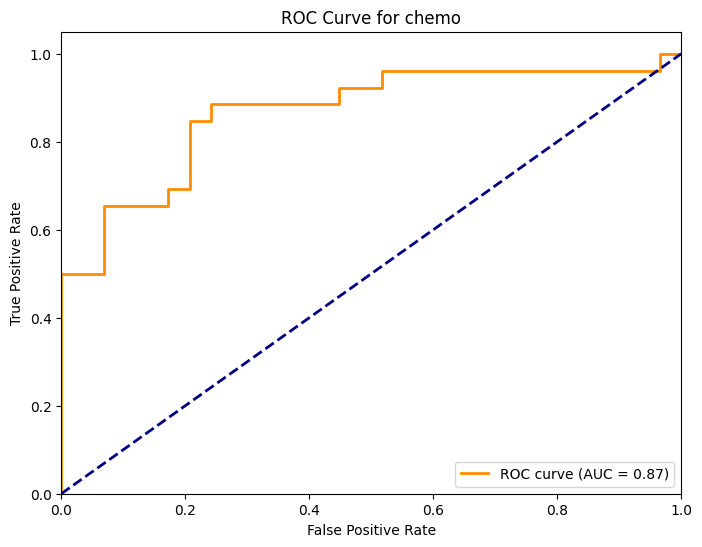

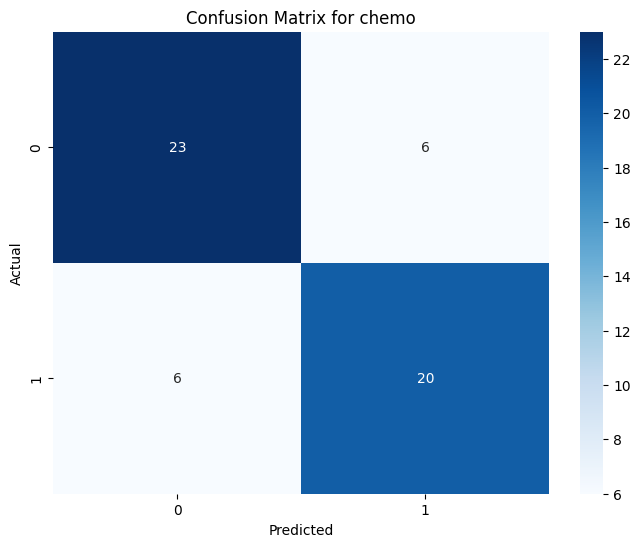

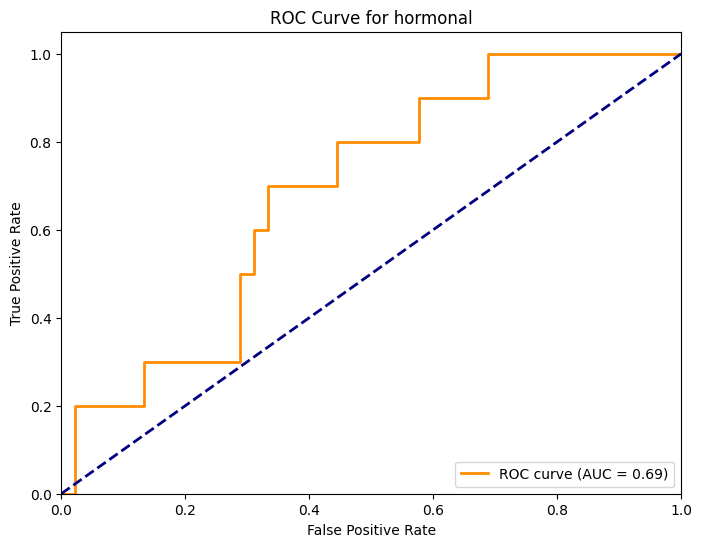

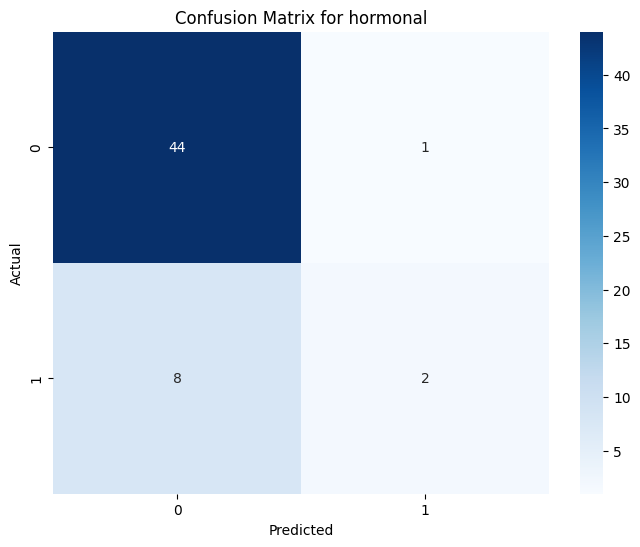

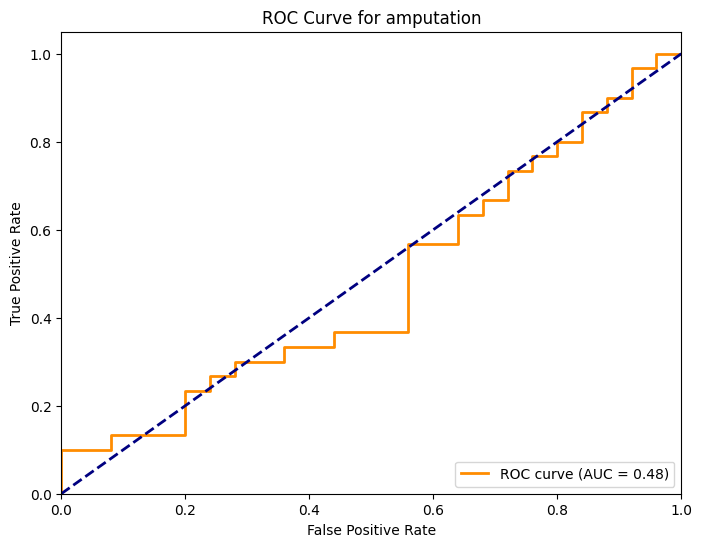

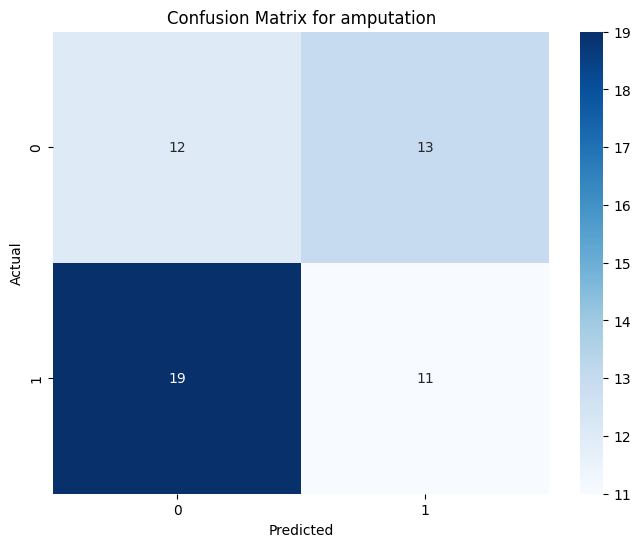

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, target_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {target_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Iterate through each target (chemo, hormonal, amputation, timerecurrence)
for target in ['chemo', 'hormonal', 'amputation', 'timerecurrence']:
    if target in ['chemo', 'hormonal', 'amputation']:
        # Use the trained classifier to predict probabilities
        predicted_probs = models[target].predict_proba(X_test_scaled)[:, 1]
    else:
        # Use the trained regressor for the timerecurrence
        predicted_probs = models[target].predict(X_test_scaled)

    if target in ['chemo', 'hormonal', 'amputation']:
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test[target], predicted_probs)

        # Calculate AUC (Area Under the Curve)
        auc = roc_auc_score(y_test[target], predicted_probs)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {target}')
        plt.legend(loc='lower right')
        plt.show()

    # Calculate and plot confusion matrix for classification targets
    if target in ['chemo', 'hormonal', 'amputation']:
        predicted_labels = (predicted_probs > 0.5).astype(int)  # Convert probabilities to binary labels
        plot_confusion_matrix(y_test[target], predicted_labels, target)


# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Assuming 'data' is a pandas DataFrame with the necessary features and targets
features = df[['age', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil']]
targets = df[['timerecurrence', 'chemo', 'hormonal', 'amputation']]

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize metrics dictionaries
metrics = {}

models = {}

# For each categorical target (chemo, hormonal, amputation), use Random Forest classifier
for target in ['chemo', 'hormonal', 'amputation']:
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train_scaled, y_train[target])

    # Predictions and metrics calculation
    predictions = rf_model.predict(X_test_scaled)
    metrics[target] = {
        'accuracy': accuracy_score(y_test[target], predictions),
        'precision': precision_score(y_test[target], predictions, average='macro'),
        'recall': recall_score(y_test[target], predictions, average='macro'),
        'f1_score': f1_score(y_test[target], predictions, average='macro')
    }
    models[target] = rf_model

# For the continuous target (timerecurrence), use Random Forest regressor
rf_reg_model = RandomForestRegressor()
rf_reg_model.fit(X_train_scaled, y_train['timerecurrence'])
models['timerecurrence'] = rf_reg_model

# Predictions and mean squared error for regression
predictions = rf_reg_model.predict(X_test_scaled)
metrics['timerecurrence'] = {
    'mean_squared_error': mean_squared_error(y_test['timerecurrence'], predictions)
}

metrics


{'chemo': {'accuracy': 0.8181818181818182,
  'precision': 0.8176392572944298,
  'recall': 0.8176392572944298,
  'f1_score': 0.8176392572944298},
 'hormonal': {'accuracy': 0.8,
  'precision': 0.4074074074074074,
  'recall': 0.4888888888888889,
  'f1_score': 0.4444444444444444},
 'amputation': {'accuracy': 0.5272727272727272,
  'precision': 0.5336021505376345,
  'recall': 0.5333333333333333,
  'f1_score': 0.5271164021164021},
 'timerecurrence': {'mean_squared_error': 24.809774494162454}}

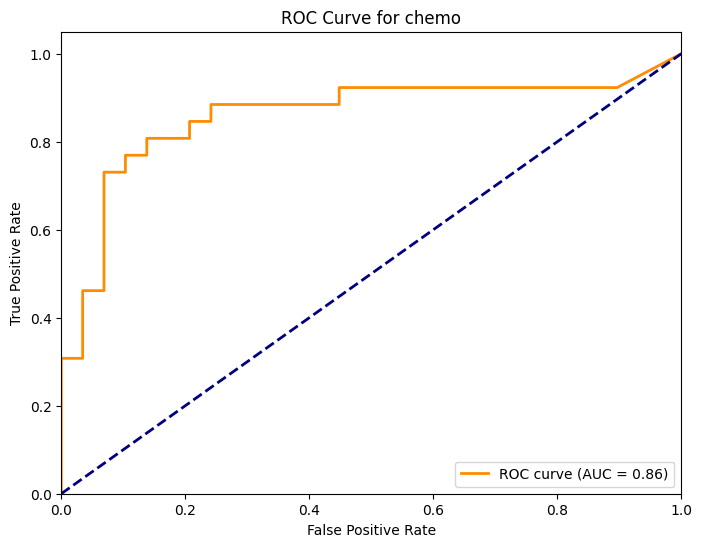

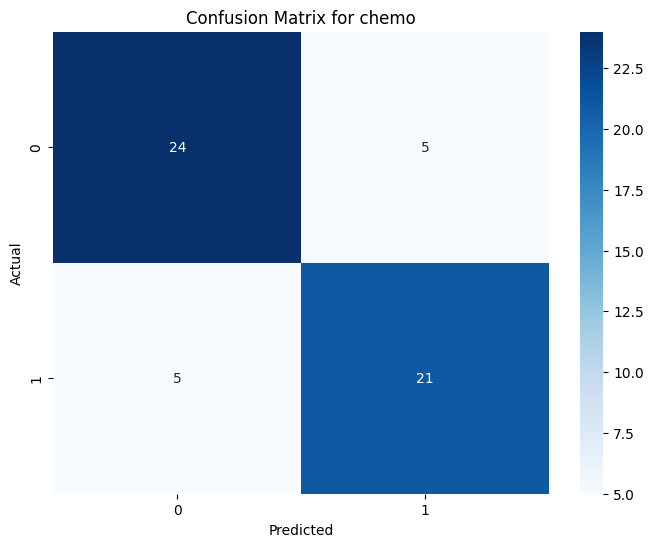

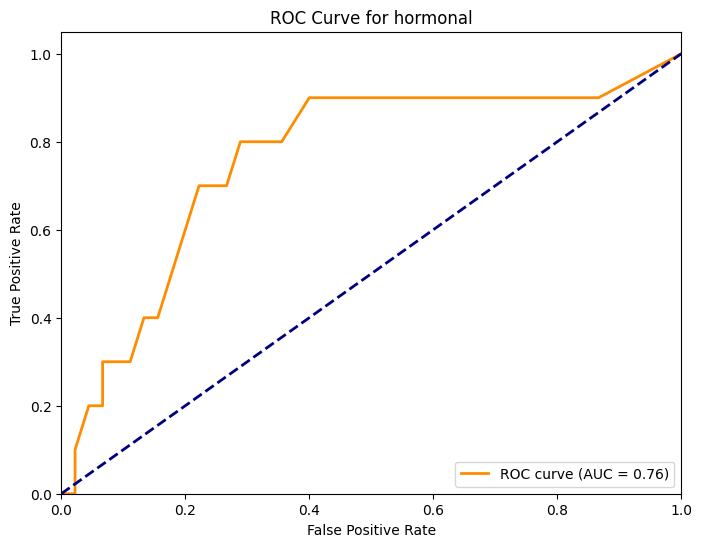

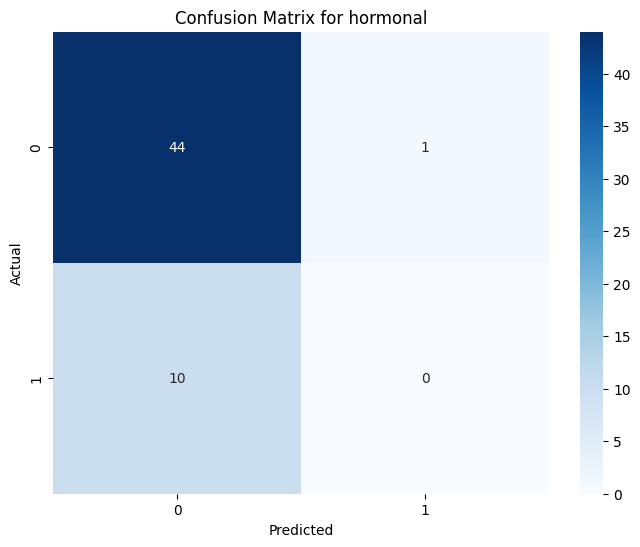

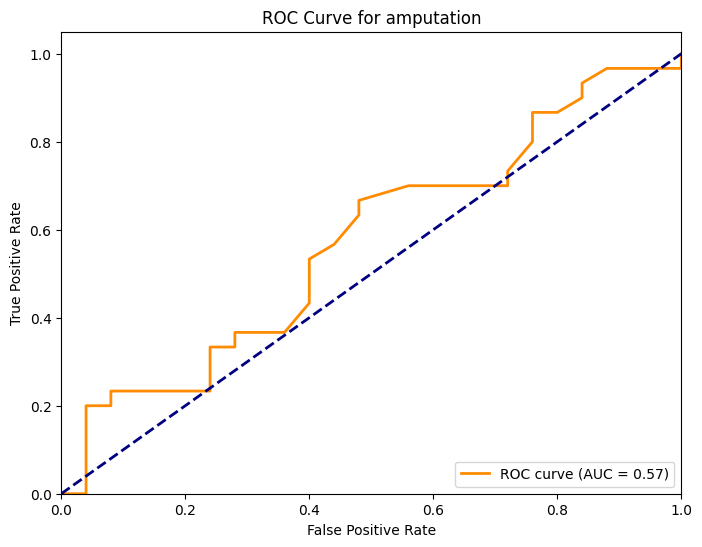

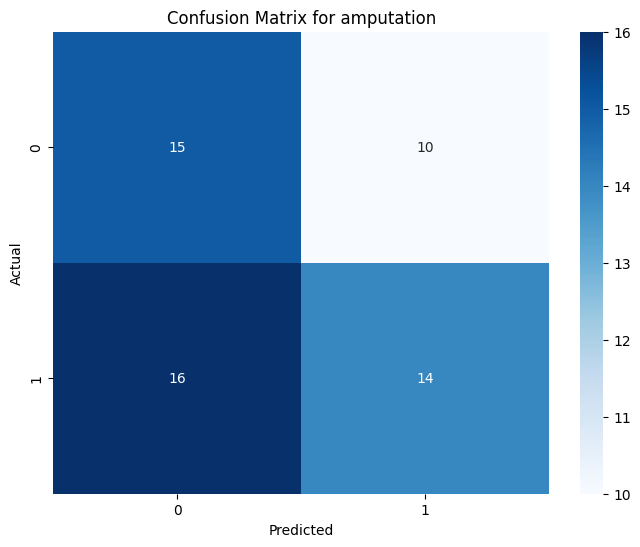

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, target_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {target_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Iterate through each target (chemo, hormonal, amputation, timerecurrence)
for target in ['chemo', 'hormonal', 'amputation', 'timerecurrence']:
    if target in ['chemo', 'hormonal', 'amputation']:
        # Use the trained classifier to predict probabilities
        predicted_probs = models[target].predict_proba(X_test_scaled)[:, 1]
    else:
        # Use the trained regressor for the timerecurrence
        predicted_probs = models[target].predict(X_test_scaled)

    if target in ['chemo', 'hormonal', 'amputation']:
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test[target], predicted_probs)

        # Calculate AUC (Area Under the Curve)
        auc = roc_auc_score(y_test[target], predicted_probs)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {target}')
        plt.legend(loc='lower right')
        plt.show()

    # Calculate and plot confusion matrix for classification targets
    if target in ['chemo', 'hormonal', 'amputation']:
        predicted_labels = (predicted_probs > 0.5).astype(int)  # Convert probabilities to binary labels
        plot_confusion_matrix(y_test[target], predicted_labels, target)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

# Assuming 'data' is a pandas DataFrame with the necessary features and targets
features = df[['age', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil']]
targets = df[['timerecurrence', 'chemo', 'hormonal', 'amputation']]

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize metrics
metrics = {}

# Neural network parameters
input_shape = (X_train_scaled.shape[1],)
n_classes = 1  # For binary classification tasks

# Define a function to create a simple neural network
def create_model(n_classes):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(n_classes, activation='sigmoid' if n_classes == 1 else 'softmax'))
    return model

# For each binary classification target (chemo, hormonal, amputation)
for target in ['chemo', 'hormonal', 'amputation']:
    model = create_model(n_classes)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_scaled, y_train[target], epochs=10, batch_size=32, verbose=0)

    # Predictions and metrics calculation
    predictions = model.predict(X_test_scaled)
    predicted_classes = (predictions > 0.5).astype(int)
    accuracy = accuracy_score(y_test[target], predicted_classes)
    metrics[target] = {'accuracy': accuracy}

# For the continuous target (timerecurrence), use a regression neural network
reg_model = create_model(1)  # Single output node for regression
reg_model.compile(optimizer='adam', loss='mean_squared_error')
reg_model.fit(X_train_scaled, y_train['timerecurrence'], epochs=10, batch_size=32, verbose=0)

# Predictions and mean squared error for regression
predictions = reg_model.predict(X_test_scaled)
mse = mean_squared_error(y_test['timerecurrence'], predictions)
metrics['timerecurrence'] = {'mean_squared_error': mse}

metrics


2/2 [==============================] - 0s 7ms/step


{'chemo': {'accuracy': 0.7818181818181819},
 'hormonal': {'accuracy': 0.8181818181818182},
 'amputation': {'accuracy': 0.6545454545454545},
 'timerecurrence': {'mean_squared_error': 58.69578932934539}}

# Neural network


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Assuming 'data' is a pandas DataFrame with the necessary features and targets
features = df[['age', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil']]
targets = df[['timerecurrence', 'chemo', 'hormonal', 'amputation']]

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize metrics
metrics = {}

# Neural network parameters
input_shape = (X_train_scaled.shape[1],)
n_classes = 1  # For binary classification tasks

# Define a function to create a simple neural network
def create_model(n_classes):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(n_classes, activation='sigmoid' if n_classes == 1 else 'softmax'))
    return model

# For each binary classification target (chemo, hormonal, amputation)
for target in ['chemo', 'hormonal', 'amputation']:
    model = create_model(n_classes)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_scaled, y_train[target], epochs=10, batch_size=32, verbose=0)

    # Predictions and metrics calculation
    predictions = model.predict(X_test_scaled).flatten()
    predicted_classes = (predictions > 0.5).astype(int)
    accuracy = accuracy_score(y_test[target], predicted_classes)
    precision = precision_score(y_test[target], predicted_classes)
    recall = recall_score(y_test[target], predicted_classes)
    f1 = f1_score(y_test[target], predicted_classes)
    metrics[target] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# For the continuous target (timerecurrence), use a regression neural network
reg_model = create_model(1)  # Single output node for regression
reg_model.compile(optimizer='adam', loss='mean_squared_error')
reg_model.fit(X_train_scaled, y_train['timerecurrence'], epochs=10, batch_size=32, verbose=0)

# Predictions and mean squared error for regression
predictions = reg_model.predict(X_test_scaled).flatten()
mse = mean_squared_error(y_test['timerecurrence'], predictions)
metrics['timerecurrence'] = {'mean_squared_error': mse}

metrics


2/2 [==============================] - 0s 5ms/step


2/2 [==============================] - 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 [==============================] - 0s 6ms/step


{'chemo': {'accuracy': 0.8,
  'precision': 0.8571428571428571,
  'recall': 0.6923076923076923,
  'f1_score': 0.7659574468085107},
 'hormonal': {'accuracy': 0.8181818181818182,
  'precision': 0.0,
  'recall': 0.0,
  'f1_score': 0.0},
 'amputation': {'accuracy': 0.6181818181818182,
  'precision': 0.7647058823529411,
  'recall': 0.43333333333333335,
  'f1_score': 0.5531914893617021},
 'timerecurrence': {'mean_squared_error': 59.04186566774604}}

# SVC


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

# Assuming 'df' is your pandas DataFrame with the necessary features and targets
features = df[['age', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil']]
targets = df[['chemo', 'hormonal', 'amputation']]

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize metrics dictionaries
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

models = {}

# For each categorical target (chemo, hormonal, amputation), use SVC (classification) with probability enabled
for target in ['chemo', 'hormonal', 'amputation']:
    svm_model = SVC(kernel='linear', probability=True)
    svm_model.fit(X_train_scaled, y_train[target])
    models[target] = svm_model

# Function to adjust the threshold
def adjust_threshold(model, X, y, threshold):
    probabilities = model.predict_proba(X)[:, 1]
    predictions = (probabilities >= threshold).astype(int)
    accuracy_scores[target] = accuracy_score(y, predictions)
    precision_scores[target] = precision_score(y, predictions)
    recall_scores[target] = recall_score(y, predictions)
    f1_scores[target] = f1_score(y, predictions)

# Adjusting thresholds
new_thresholds = {'chemo': 0.5, 'hormonal': 0.3, 'amputation': 0.3}
for target in ['chemo', 'hormonal', 'amputation']:
    adjust_threshold(models[target], X_test_scaled, y_test[target], new_thresholds[target])

# Collecting all metrics in a single dictionary for output
metrics = {
    'accuracy': accuracy_scores,
    'precision': precision_scores,
    'recall': recall_scores,
    'f1_score': f1_scores
}

metrics


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': {'chemo': 0.7818181818181819,
  'hormonal': 0.8181818181818182,
  'amputation': 0.5818181818181818},
 'precision': {'chemo': 0.85,
  'hormonal': 0.0,
  'amputation': 0.5686274509803921},
 'recall': {'chemo': 0.6538461538461539,
  'hormonal': 0.0,
  'amputation': 0.9666666666666667},
 'f1_score': {'chemo': 0.7391304347826088,
  'hormonal': 0.0,
  'amputation': 0.7160493827160493}}

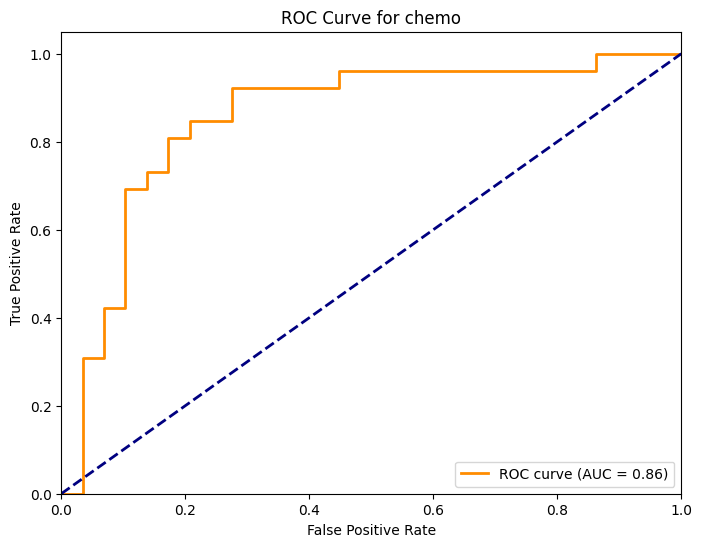

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, target_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {target_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Iterate through each target (chemo, hormonal, amputation, timerecurrence)
for target in ['chemo', 'hormonal', 'amputation', 'timerecurrence']:
    if target in ['chemo', 'hormonal', 'amputation']:
        # Use the trained classifier to predict probabilities
        predicted_probs = models[target].predict_proba(X_test_scaled)[:, 1]
    else:
        # Use the trained regressor for the timerecurrence
        predicted_probs = models[target].predict(X_test_scaled)

    if target in ['chemo', 'hormonal', 'amputation']:
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test[target], predicted_probs)

        # Calculate AUC (Area Under the Curve)
        auc = roc_auc_score(y_test[target], predicted_probs)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {target}')
        plt.legend(loc='lower right')
        plt.show()

    # Calculate and plot confusion matrix for classification targets
    if target in ['chemo', 'hormonal', 'amputation']:
        predicted_labels = (predicted_probs > 0.5).astype(int)  # Convert probabilities to binary labels
        plot_confusion_matrix(y_test[target], predicted_labels, target)


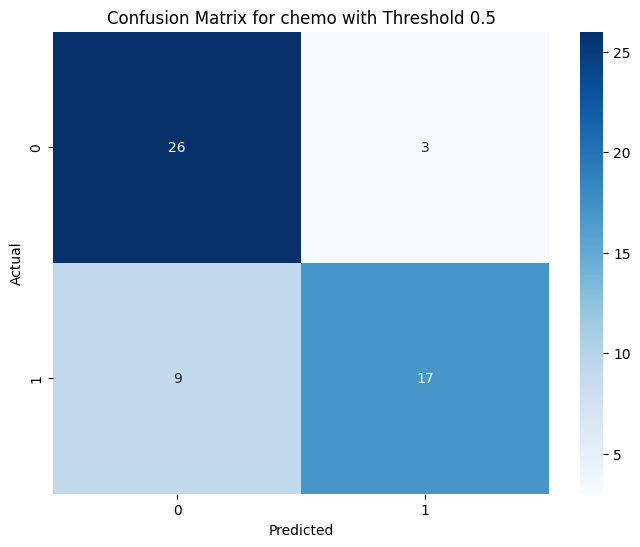

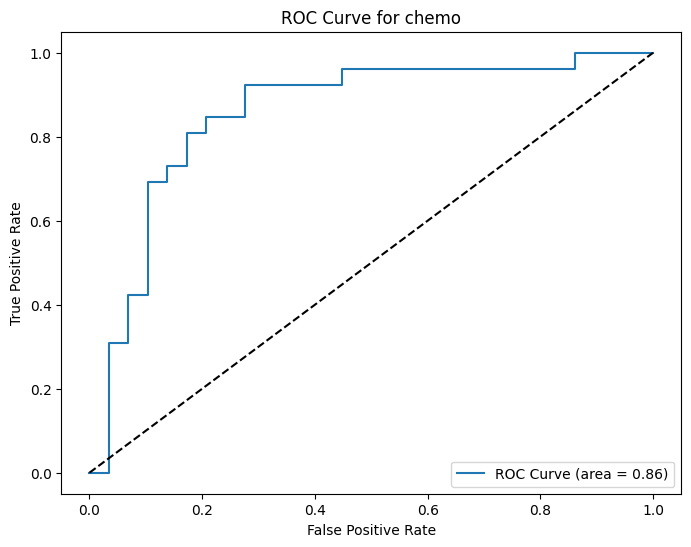

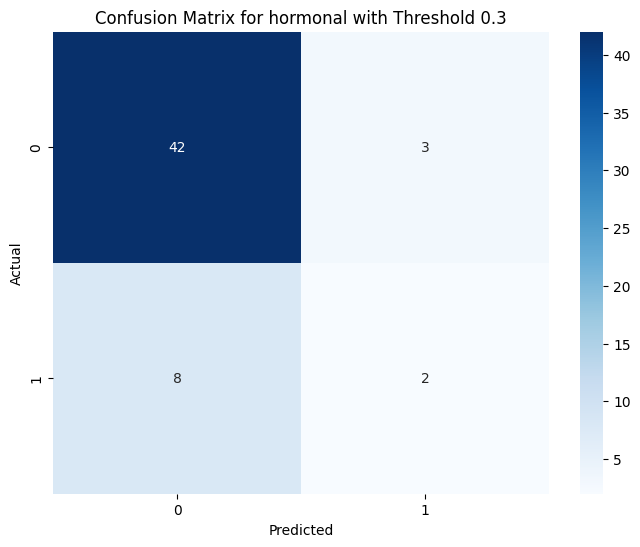

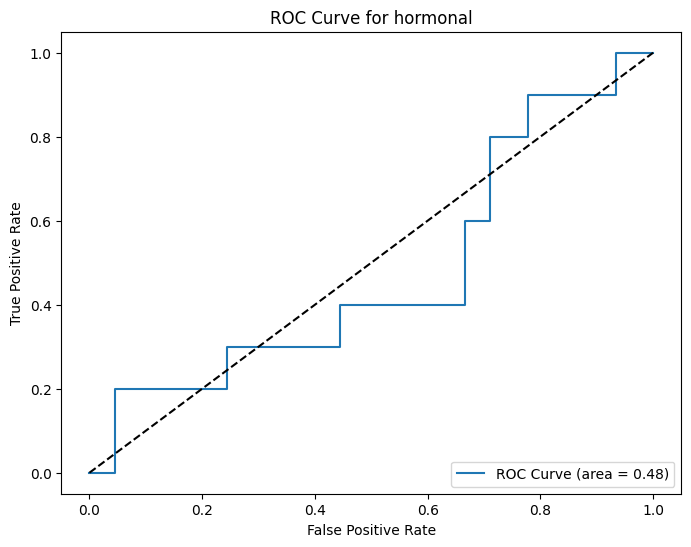

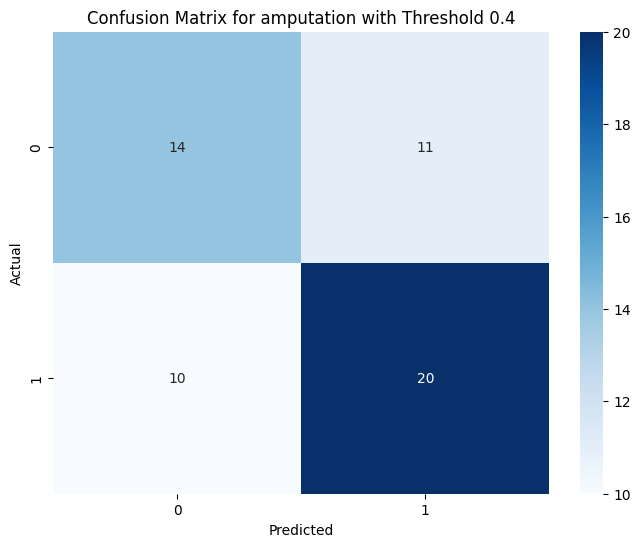

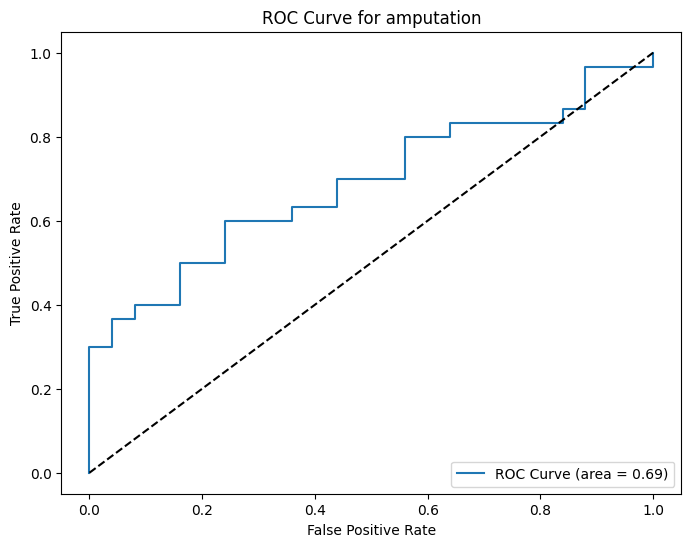

{'chemo': {'accuracy': 0.7818181818181819,
  'precision': 0.85,
  'recall': 0.6538461538461539,
  'f1_score': 0.7391304347826088,
  'roc_auc': 0.8554376657824934},
 'hormonal': {'accuracy': 0.8,
  'precision': 0.4,
  'recall': 0.2,
  'f1_score': 0.26666666666666666,
  'roc_auc': 0.4755555555555556},
 'amputation': {'accuracy': 0.6181818181818182,
  'precision': 0.6451612903225806,
  'recall': 0.6666666666666666,
  'f1_score': 0.6557377049180327,
  'roc_auc': 0.6866666666666666}}

In [ ]:
import numpy as np

# Function to apply custom threshold
def apply_threshold(probabilities, threshold):
    return np.where(probabilities >= threshold, 1, 0)

# Define custom thresholds for each target
thresholds = {'chemo': 0.5, 'hormonal': 0.3, 'amputation': 0.4}

# Initialize updated metrics dictionary
updated_metrics = {}

for target in ['chemo', 'hormonal', 'amputation']:
    model = models[target]

    # Getting probability scores
    probabilities = model.predict_proba(X_test_scaled)[:, 1]

    # Applying custom threshold
    custom_predictions = apply_threshold(probabilities, thresholds[target])

    # Re-evaluating metrics with custom threshold
    updated_metrics[target] = {
        'accuracy': accuracy_score(y_test[target], custom_predictions),
        'precision': precision_score(y_test[target], custom_predictions),
        'recall': recall_score(y_test[target], custom_predictions),
        'f1_score': f1_score(y_test[target], custom_predictions),
        'roc_auc': roc_auc_score(y_test[target], probabilities)
    }

    # Plotting the confusion matrix with custom threshold
    cm = confusion_matrix(y_test[target], custom_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {target} with Threshold {thresholds[target]}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Plotting ROC curve
    fpr, tpr, _ = roc_curve(y_test[target], probabilities)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (area = {updated_metrics[target]["roc_auc"]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {target}')
    plt.legend(loc='lower right')
    plt.show()

updated_metrics
